#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Datasets

In [2]:
import gdown

gdown_file = '1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3'
gdown_url = f'https://drive.google.com/uc?id={gdown_file}'
gdown.download(gdown_url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: d:\C\vscode\AIO2024-EXERCISES\Module 3\Week 4\Housing.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 401kB/s]


'Housing.csv'

In [3]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Categorical Encoding

In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [6]:
for cols in cat_cols:
    category = df[cols].unique()
    print(f'Number of unique values in {cols} is {len(category)}')

Number of unique values in mainroad is 2
Number of unique values in guestroom is 2
Number of unique values in basement is 2
Number of unique values in hotwaterheating is 2
Number of unique values in airconditioning is 2
Number of unique values in prefarea is 2
Number of unique values in furnishingstatus is 3


In [7]:
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded, columns=cat_cols)
Number_df = df.drop(cat_cols, axis=1)
encoded_df = pd.concat([Number_df, encoded_cat_df], axis=1)

In [8]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalization

In [9]:
normalization = StandardScaler()
normalized = normalization.fit_transform(encoded_df)

#### Train/Test split

In [10]:
x, y = normalized[:, 1:], normalized[:, 0]

In [11]:
test_size = 0.2
random_state = 42
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(
    x, 
    y, 
    test_size=test_size, 
    random_state=random_state, 
    shuffle=is_shuffle
    )

In [12]:
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of validation samples: {x_val.shape[0]}')

Number of training samples: 436
Number of validation samples: 109


### Training & Evaluation

#### Random Forest

In [13]:
rf = RandomForestRegressor(
    random_state=random_state
    )
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf.predict(x_val)

In [15]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.5500257513046061
Mean Squared Error: 0.5687577598376748


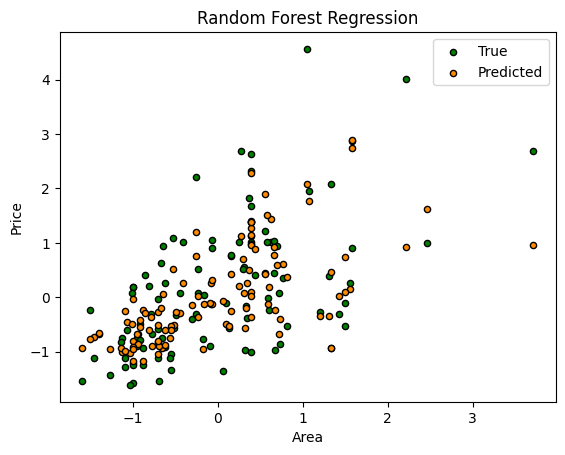

In [16]:
plt.figure()
plt.scatter(x_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(x_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

#### AdaBoost

In [17]:
adaboost = AdaBoostRegressor(
    random_state=random_state
    )
adaboost.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [18]:
y_pred = adaboost.predict(x_val)

In [20]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.6112267148813586
Mean Squared Error: 0.6316814503965034


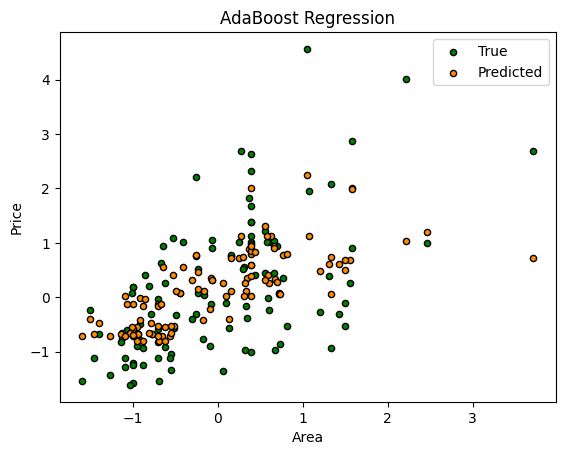

In [21]:
plt.figure()
plt.scatter(x_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(x_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

#### Gradient Boosting

In [22]:
gradientboost = GradientBoostingRegressor(
    random_state=random_state
    )
gradientboost.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [23]:
y_pred = gradientboost.predict(x_val)

In [24]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.5157992962816175
Mean Squared Error: 0.48518926762880976


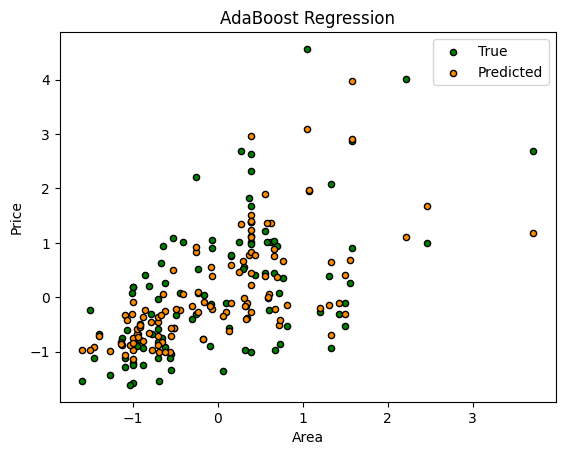

In [25]:
plt.figure()
plt.scatter(x_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(x_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("AdaBoost Regression")
plt.legend()
plt.show()